In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

In [9]:
X = np.load('X_data.npy')
y = np.load('y_data.npy')


In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
def create_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv3D(32, kernel_size=3, activation='relu', input_shape=input_shape),
        layers.MaxPooling3D(pool_size=2),
        layers.Conv3D(64, kernel_size=3, activation='relu'),
        layers.MaxPooling3D(pool_size=2),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [12]:
model = create_model((64, 64, 64, 1), 7)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


c:\Users\abdel\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
history = model.fit(
    X_train[..., np.newaxis], 
    y_train, 
    validation_data=(X_val[..., np.newaxis], y_val), 
    epochs=50, 
    batch_size=32
)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.2430 - loss: 2.2042 - val_accuracy: 0.4255 - val_loss: 1.6903
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.5463 - loss: 1.4532 - val_accuracy: 0.5319 - val_loss: 1.1714
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.8044 - loss: 0.5878 - val_accuracy: 0.7872 - val_loss: 0.5647
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.8442 - loss: 0.3148 - val_accuracy: 0.7447 - val_loss: 0.9030
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.9730 - loss: 0.1011 - val_accuracy: 0.8085 - val_loss: 0.4710
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 1.0000 - loss: 0.0135 - val_accuracy: 0.7872 - val_loss: 0.4497
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 0.7872 - val_loss: 0.5320
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.7872 - val_loss: 0.6156
Epoch 9/

In [14]:
model.save('teeth_classification_model.h5')

In [15]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

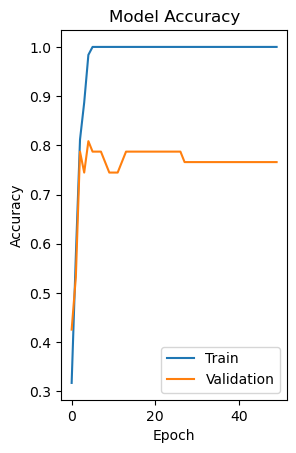

In [16]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

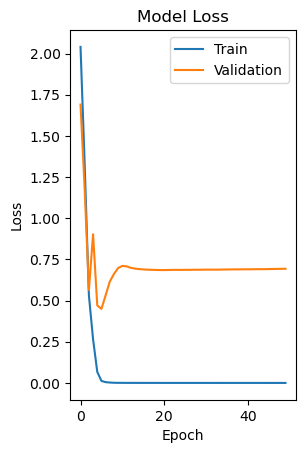

In [17]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

In [18]:
plt.tight_layout()
plt.savefig('training_validation_metrics.png')

<Figure size 640x480 with 0 Axes>

In [19]:
plt.show()